#參考 : spam-detection/.ipynb_checkpoints/src-checkpoint.ipynb

https://github.com/aliabdallah7/spam-detection

https://github.com/aliabdallah7/spam-detection/blob/main/.ipynb_checkpoints/src-checkpoint.ipynb



In [42]:
!pip install pandas
import pandas as pd 

# Load the dataset
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
df = pd.read_table(url, header=None, names=['label', 'message'])
df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Text(0.5, 1.0, 'Number of ham and spam messages')

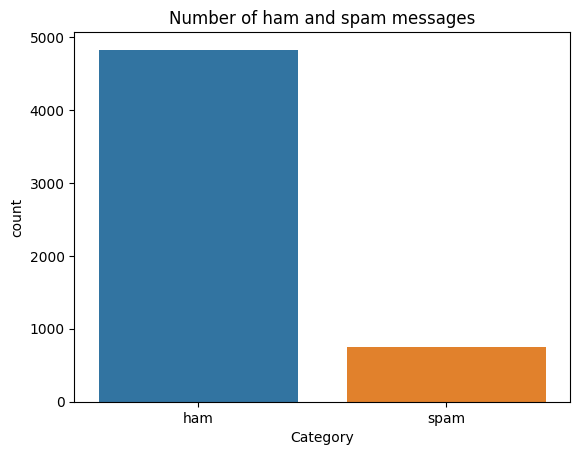

In [44]:
#plot the ham and spam messages to understand the distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x=df['label'])
plt.xlabel('Category')
plt.title('Number of ham and spam messages')

<Axes: title={'center': 'Category'}>

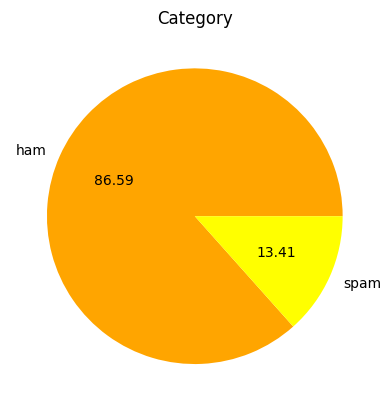

In [51]:
df.groupby('label').size().plot(kind='pie', 
                autopct='%.2f', 
                colors=['orange', 'yellow'], 
                title="Category")

# Text Preprocessing

In [63]:
import string
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Stem and lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    # Join tokens back into text string
    preprocessed_text = " ".join(lemmatized_tokens)
    return preprocessed_text

# Apply preprocessing function to 'Message' column
df['message'] = df['message'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [64]:
df.head(100)

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though
...,...,...
95,spam,free ringtone waiting collected simply text pa...
96,ham,watching telugu moviewat abt u
97,ham,see finish load loan pay
98,ham,hi wk ok hols yes bit run forgot hairdresser a...


#Modeling

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df["label"], test_size = 0.2, random_state = 0)

In [72]:
# Generate the bag-of-words features
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [73]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       1.00      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.98      0.98      1115

Logistic Regression accuracy is: 98.48%


Confusion Matrix for Logistic Regression :
 [[955   0]
 [ 17 143]] 



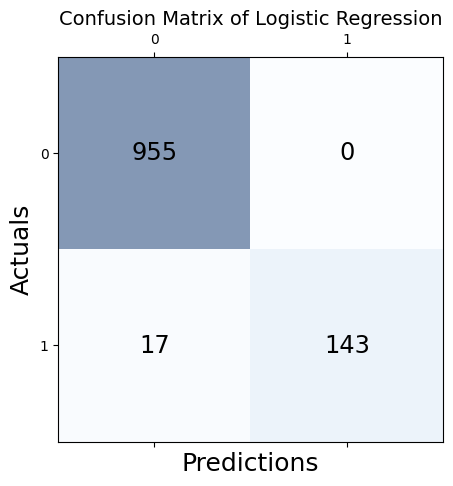

In [75]:
# Confusion Matrix for Logistic Regression 
from sklearn import metrics
 
cm = metrics.confusion_matrix(y_test, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=14)
plt.show()

In [76]:
# SVC Model: Support Vector Classification
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)
print(classification_report(y_test, predict_svc))

SVCAcc = accuracy_score(predict_svc,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       955
        spam       0.99      0.92      0.95       160

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

SVC model accuracy is: 98.74%


Confusion Matrix for SVC :
 [[954   1]
 [ 13 147]] 



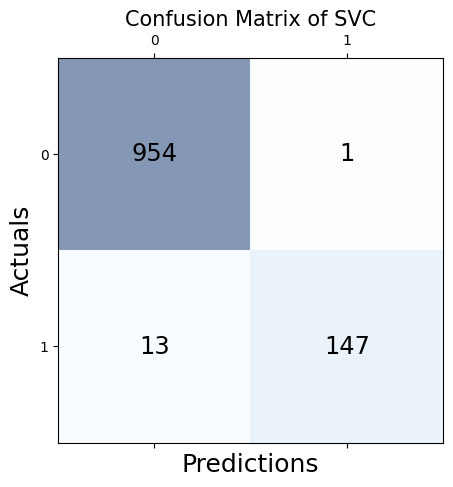

In [79]:
cm = metrics.confusion_matrix(y_test, predict_svc)
print('Confusion Matrix for SVC :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of SVC', fontsize=15)
plt.show()

In [78]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred_rf = clf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

rfAcc = accuracy_score(y_pred_rf,y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(rfAcc*100))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       1.00      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Random Forest model accuracy is: 97.94%


Confusion Matrix for Random Forest :
 [[955   0]
 [ 23 137]] 



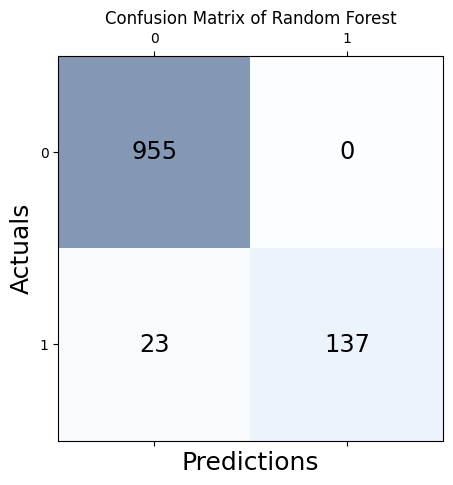

In [80]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix for Random Forest :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Random Forest', fontsize=12)
plt.show()

In [81]:
# Multinomial Naive Bayes Model
# Train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred_naive = nb.predict(x_test)
print(classification_report(y_test, y_pred_naive))

naiveAcc = accuracy_score(y_pred_naive,y_test)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naiveAcc*100))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       955
        spam       0.98      0.94      0.96       160

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Naive Bayes model accuracy is: 98.92%


Confusion Matrix for Random Forest :
 [[952   3]
 [  9 151]] 



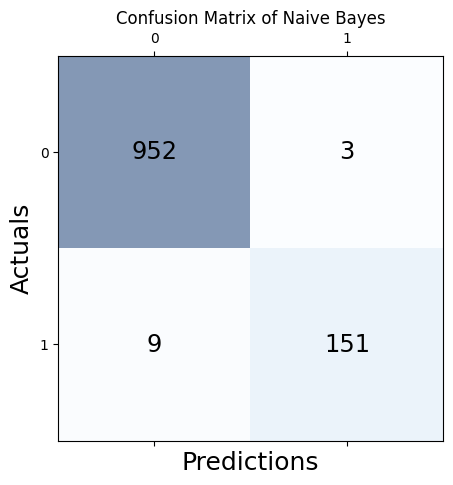

In [82]:
cm = metrics.confusion_matrix(y_test, y_pred_naive)
print('Confusion Matrix for Random Forest :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Naive Bayes', fontsize=12)
plt.show()

In [83]:
# Load the Multinomial Naive Bayes Model
import joblib
import numpy as np 

joblib_file = "model_NB"
joblib.dump(nb, joblib_file)
loaded_model = joblib.load(open(joblib_file, 'rb'))
pred_y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, pred_y), 2)
print(result)

0.99


#Notes: 
###1.產生Multinomial Naive Bayes Model : /content/model_NB

###2.將檔案打包貼到GitHub: https://github.com/jjchen100kimo/spam2

###3.然後在Streamlit產生網頁 https://jjchen100kimo-spam2-spam-app-c1f2qt.streamlit.app/
